In [2]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y = None):
        pass

    #predict() 메서드는 단순히 Sex 피처가 1이면, 0, 그렇지 않으면 1로 예측.
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace = True)
    df['Cabin'].fillna('N',inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0,inplace = True)

    return df

#머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name','Ticket'], axis = 1, inplace =True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    
#원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df = pd.read_csv(r'C:\Users\pinki\Documents\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

#위에서 생성한 Dummy Classifier를 이용해 학습/예측/퍙가
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 0.7877


C:\Users\pinki\AppData\Local\Temp\ipykernel_18088\1872080599.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)
C:\Users\pinki\AppData\Local\Temp\ipykernel_18088\1872080599.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [36]:
from sklearn.datasets import load_digits
from sklearn.base import BaseEstimator

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros( (len(X),1), dtype = bool)

digits = load_digits()

#digits 번호가 7번이면 true고 이를 astype(int)로 1로 변환

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

print('레이블 테스트 세트 크기 :',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


In [11]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
digits_df = pd.DataFrame(data = digits, columns = digits.feature_names)
print(digits_df.head())

Empty DataFrame
Columns: [pixel_0_0, pixel_0_1, pixel_0_2, pixel_0_3, pixel_0_4, pixel_0_5, pixel_0_6, pixel_0_7, pixel_1_0, pixel_1_1, pixel_1_2, pixel_1_3, pixel_1_4, pixel_1_5, pixel_1_6, pixel_1_7, pixel_2_0, pixel_2_1, pixel_2_2, pixel_2_3, pixel_2_4, pixel_2_5, pixel_2_6, pixel_2_7, pixel_3_0, pixel_3_1, pixel_3_2, pixel_3_3, pixel_3_4, pixel_3_5, pixel_3_6, pixel_3_7, pixel_4_0, pixel_4_1, pixel_4_2, pixel_4_3, pixel_4_4, pixel_4_5, pixel_4_6, pixel_4_7, pixel_5_0, pixel_5_1, pixel_5_2, pixel_5_3, pixel_5_4, pixel_5_5, pixel_5_6, pixel_5_7, pixel_6_0, pixel_6_1, pixel_6_2, pixel_6_3, pixel_6_4, pixel_6_5, pixel_6_6, pixel_6_7, pixel_7_0, pixel_7_1, pixel_7_2, pixel_7_3, pixel_7_4, pixel_7_5, pixel_7_6, pixel_7_7]
Index: []

[0 rows x 64 columns]


In [13]:
#오차행렬
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)
#순서는 [[TN(pred : Negative, real : Negative), FP(pred : Positive, real : Negative)],
#         [FN(pred : Negative, real : Positive), TP(pred : Positive, real : Positive)]

array([[405,   0],
       [ 45,   0]])

In [19]:
#정확도 : (TN + TP)/(TN + FP + FN + TP)
#정밀도 : TP / (FP + TP)
#재현율 : TP / (FN + TP)
#재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN을 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞춤
#정밀도 계산을 위해 presicion_score()을, 재현율 계산을 위해 recall_score()을 제공함
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [38]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [21]:
#정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움.
#predict_proba() 개별 데이터별로 예측 확률을 반한하는 메서드
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba arrya에서 앞 3개만 샘플로 추출 \n', pred_proba[:3])

#예측 확률 array와 예측 결과값 array를 병합해 예측확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape : (179, 2)
pred_proba arrya에서 앞 3개만 샘플로 추출 
 [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429646 0.13570354]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429646 0.13570354 0.        ]]


In [22]:
#임계값을 구현하는 Binarizer
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

#X 개별 원소들이 threshold값보다 같거나 작으면 0을 아니면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [28]:
#Binarizerdml threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.4

#predict_proba()반환값의 두번째 칼럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer을 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [31]:
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 :', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 : 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값 : 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임계값 : 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임계값 : 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임계값 : 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [39]:
#precision_recall_curve() 입력 파라미터 : y_true(실제 클래값 배열), provas_pred(Positive 칼럼의 예측 확률 배열)
#반환값 : 정밀도, 재현율(임계값별 값을 배열로 반환)
from sklearn.metrics import precision_recall_curve

#레이블 값이 1 일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일때의 예측 확률을 precision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 암곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


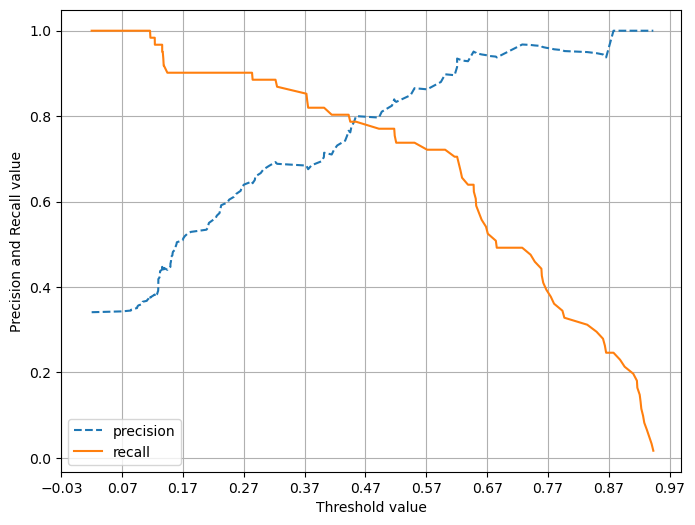

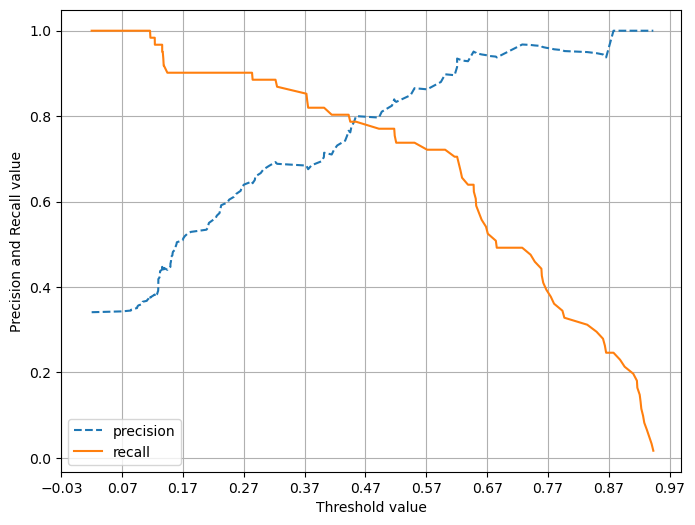

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 주행. 정밀도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    #threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))

    #x축, y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])